In [2]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [23]:
def plot_learning_curve(histfile,label,color='b',flag_plot_train=False,ax=None):
    
    if ax is None:
        #create a new figure
        fig,ax=plt.subplots(1, 2, sharex=True,figsize=(10,5))
    
    try:
        history=cPickle.load(open(histfile,'rb'))
    except:
        print "Can't open history file %s, skipping exp %s" % (histfile,label)
        return ax
    
    train_loss=np.asarray(history['train_loss'])
    val_loss=np.asarray(history['val_loss'])
    val_loss=np.concatenate(([5],val_loss))

    xval=np.arange(val_loss.shape[0])
    
    xtrain=np.linspace(0,np.max(xval),train_loss.shape[0])
    if flag_plot_train:
        ax[0].plot(xtrain,train_loss,color=[c for c in matplotlib.colors.ColorConverter.cache[color]],alpha=0.3)
    ax[0].plot(xval,val_loss,color=color,label=label,linewidth=4)
    ax[0].set_xlabel('Epoch')
    
    ax[0].set_ylabel('Loss (cross-entropy)')
    ax[0].set_ylim((0.0,1.))
    
    train_acc=np.asarray(history['train_acc'])
    val_acc=np.asarray(history['val_acc'])
    val_acc=np.concatenate(([0.],val_acc))
    
    imin=np.argmin(val_loss)
    print "Best validation acc. for %s:" % label,val_acc[imin]

    ax[1].plot(xval,val_acc,color=color,label=label,linewidth=4)
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    
    return ax

Best validation acc. for Full uRNN, N=512: 0.946799997091
Best validation acc. for Restricted uRNN, N=512: 0.94159999907


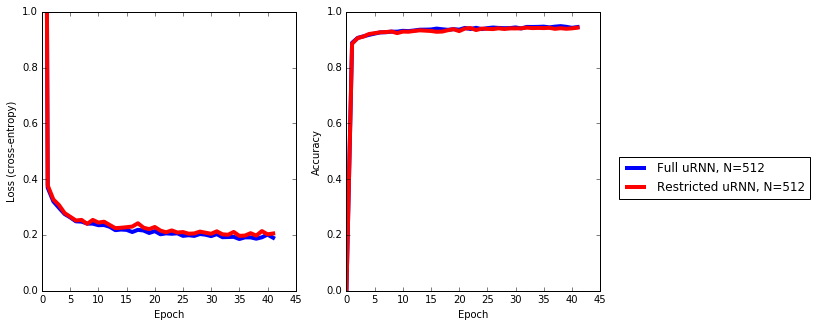

In [27]:
ax=plot_learning_curve('exp/history_mnist_fulluRNN512_lr0-0001_lrng0-000001_permuted_patience5_natGradRMS','Full uRNN, N=512')
plot_learning_curve('exp/history_mnist_restricteduRNNfast512_permuted_patience5','Restricted uRNN, N=512',ax=ax,color='r')
ax[1].legend(bbox_to_anchor=(1.05, 0.5), loc=2)